# Exploring FiveThirtyEight's Star Wars Survey

## Scenario

[Project introduction](https://app.dataquest.io/c/25/m/201/guided-project%3A-star-wars-survey/2/overview?path=2&slug=data-scientist&version=1) as presented by Dataquest:
>While waiting for [*Star Wars: The Force Awakens*](https://en.wikipedia.org/wiki/Star_Wars:_The_Force_Awakens) to come out, the team at [FiveThirtyEight](https://fivethirtyeight.com/) became interested in answering some questions about *Star Wars* fans. In particular, they wondered: **does the rest of America realize that "The Empire Strikes Back" is clearly the best of the bunch?**
>
>The team needed to collect data addressing this question. To do this, they surveyed *Star Wars* fans using the online tool SurveyMonkey. They received [1186 total responses](https://github.com/fivethirtyeight/data/blob/master/star-wars-survey/StarWars.csv).

The Star Wars film series is unique in that the order in which the films were released begins with Episode IV. Below is the [full chronological order and titles](https://editorial.rottentomatoes.com/guide/star-wars-movies-in-order/) of the main films.

1. Episode IV: A New Hope (1977)
2. Episode V: The Empire Strikes Back (1980)
3. Episode VI: Return of the Jedi (1983)
4. Episode I: The Phantom Menace (1999)
5. Episode II: Attack of the Clones (2002)
6. Episode III: Revenge of the Sith (2005)

## Goal

We validate the claim that the 2nd movie released (Episode V: The Empire Strikes Back) is the most favorited film of the series. Along the way, we clean and explore the dataset in Jupyter notebook.

## Results

We confirm the claim that Episode V: The Empire Strikes Back is America's favorite of the Star Wars series (or at least in the survey conducted by FiveThirtyEight). The first three films released (Episodes 4, 5, and 6) had an average rating between `2-3` while the last three major films released (Episodes 1, 2, 3) had an average rating of `4-5`. Note that `1` indicates `most favorite` and `6` indicates `least favorite`.

Out of a total of 1,186 respondents, we segmented and explored the various demographics:
- By number of films watched
    - 30% have not seen any Stars Wars movies
    - 70% have seen at least one
    - 40% have seen all six
- By self-identification
    - 47% are Star Wars fans
    - 35% are Star Wars fans and have seen all six movies (true Star Wars fans)
    - 87% of those who have seen all six are Star Wars fans
    - 35% are Star Trek fans
    - 88% of those who have seen all six are Star Trek fans
- Gender
    - 52% of those who have seen at least one film are male 
    - 67% of those who have not seen any Star Wars movies are female
    - 56% of Star Wars fans are male 
    - 56% of Star Trek fans are male
    - 60% of true Star Wars fans (those who identify as a fan and have seen all six movies) are male
    - 61% of true Star Wars and Star Trek fans are male
    - About half of females who are not Star Wars fans have not seen Episodes 2, 3, and 4.
- Education
    - About 90% have had at least some higher education
    - There is a slightly larger chance that a respondent with only a high school degree or less has not seen any Star Wars movies. 
- Region
    - The `Pacific`, `South Atlantic`, and `East North Central` make up the largest percentages of survey respondents and respondents who have seen at least one Star Wars film. As this is consistent among the other segments explored, it is likely that the populations in these regions are bigger.
- Age
    - Most respondents are 45-60 years old (28%)
    - 34% of those who have not seen any Star Wars films are over 60
    - 29% of those who have seen at least one are 45-60
    - 80-90% of those between 18-44 have seen each movie
    - While over 80% of those over 60 have seen Episodes 5 and 6, this dwindles down to near 50% for Episodes 2, 3, and 4
    - All age groups ranked Episode 5 the highest and Episodes 1, 2, and 3 the lowest
    - Those who have seen at least one movie and are over 60 rated Episode 1 much higher than the other age groups
    - Those who have seen at least one movie and are over 60 rated Episode 4 much lower than the other age groups
    - Mostly all Star Wars fans across the age groups have seen Episodes 5 and 6

# Table of Contents

[1. Data preprocessing](#1.-Data-preprocessing)
- 1.1 Import the libraries
- 1.2 Import the data

[2. Inspect the data](#2.-Inspect-the-data)
- 2.1 Data dictionary
- 2.2 Check for duplicates

[3. Clean the data](#3.-Clean-the-data)
- 3.1 Clean up the column headers
    - 3.1.1 Original column names
    - 3.1.2 Cleaned column names
- 3.2 Convert values to appropriate data types
    - 3.2.1 Clean and map Yes/No columns
    - 3.2.2 Clean and map columns for watched movies
    - 3.2.3 Clean and map columns for character favorability
- 3.3 Check order of Age values
- 3.4 Check validity of respondents having watched at least one Star Wars film

[4. Analyze the data](#4.-Analyze-the-data)
- 4.1 Create functions to generate `Most Viewed` and `Highest Ranked` plots
    - 4.1.1 Function to generate `Most Viewed` plot
    - 4.1.2 Function to generate `Highest Ranked` plot
- 4.2 Respondents who have seen at least one Star Wars film
    - 4.2.1 Find the most viewed movies
    - 4.2.2 Find the highest ranked movies
- 4.3 Respondents who have seen all six films
    - 4.3.1 Find the highest rated movies

[5. Explore the data by binary segments](#5.-Explore-the-data-by-binary-segments)
- 5.1 Star Wars fans
- 5.2 True Star Wars fans
- 5.3 Star Trek fans
- 5.4 Gender
- 5.5 Education
- 5.6 Region

[6. Explore age populations](#6.-Explore-age-populations)
- 6.1 Create a function to plot individual age distributions
- 6.2 Respondents by age who submitted a survey
- 6.3 Respondents by age who have not seen a Star Wars movie
- 6.4 Respondents by age who have seen Star Wars

[7. Explore major age population segments](#7.-Explore-major-age-population-segments)
- 7.1 Create functions to plot grouped age distributions
- 7.2 Respondents by age who have seen at least one Star Wars movie
- 7.3 Respondents by age who have seen all six movies
- 7.4 Star Wars fans by age
- 7.5 True Star Wars fans by age 

# 1. Data preprocessing

## 1.1 Import the libraries

In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

%matplotlib inline
warnings.filterwarnings("ignore")

## 1.2 Import the data

In [2]:
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")

# 2. Inspect the data

## 2.1 Data dictionary

- `RespondentID` - an anonymized ID for the respondent (person taking the survey)
- `Have you seen any of the 6 films in the Star Wars franchise?` - a `Yes` or `No` response
- `Do you consider yourself to be a fan of the Star Wars film franchise?` - a `Yes` or `No` response
- `Which of the following Star Wars films have you seen? Please select all that apply.` - six columns of titles seen
- `Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.` - six columns with values between 1-6
- `Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.` - 14 characters
- `Which character shot first?` - true fan question
- `Are you familiar with the Expanded Universe?` - true fan question
- `Do you consider yourself to be a fan of the Expanded Universe?` - true fan question
- `Do you consider yourself to be a fan of the Star Trek franchise?` - a `Yes` or `No` response
- `Gender` - the respondent's gender
- `Age` - the respondent's age
- `Household Income` - the respondent's income
- `Education` - the respondent's education level
- `Location (Census Region)` - the respondent's location

In [3]:
star_wars.shape

(1186, 38)

The dataset has 1,186 entries and 38 columns.

## 2.2 Check for duplicates

In [4]:
star_wars_copy = star_wars.drop_duplicates(subset=["RespondentID"])
print(star_wars_copy.shape)

(1186, 38)


There are no duplicates in the dataset.

We view the first 10 entries.

In [5]:
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3292719380,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1.0,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
6,3292684787,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6.0,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
7,3292663732,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4.0,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
8,3292654043,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Somewhat favorably,Han,No,NaN,No,Male,18-29,"$0 - $24,999",Some college or Associate degree,South Atlantic
9,3292640424,Yes,No,NaN,Star Wars: Episode II Attack of the Clones,NaN,NaN,NaN,NaN,1.0,...,Very favorably,I don't understand this question,No,NaN,No,Male,18-29,"$25,000 - $49,999",Some college or Associate degree,Pacific

Inspecting the sample output, we will need to relabel many of the column headers to be more intuitive. 

It also appears for those who have seen at least one film, ratings were provided for all the films. There are entries where movies that haven't been seen are ranked higher than the one(s) they have.

# 3. Clean the data

## 3.1 Clean up column headers

### 3.1.1 Original column names

In [6]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

First, we rename the column headers. From the original data, we know the order in which the character columns are listed.

In [7]:
star_wars = star_wars.rename(columns={
    "Have you seen any of the 6 films in the Star Wars franchise?":"Have you seen at least one Star Wars film?",
    "Do you consider yourself to be a fan of the Star Wars film franchise?":"Are you a Star Wars fan?",
    "Which of the following Star Wars films have you seen? Please select all that apply.":"Watched Ep 1",
    "Unnamed: 4":"Watched Ep 2",
    "Unnamed: 5":"Watched Ep 3",
    "Unnamed: 6":"Watched Ep 4",
    "Unnamed: 7":"Watched Ep 5",
    "Unnamed: 8":"Watched Ep 6",
    "Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.":"Ranked Ep 1",
    "Unnamed: 10":"Ranked Ep 2",
    "Unnamed: 11":"Ranked Ep 3",
    "Unnamed: 12":"Ranked Ep 4",
    "Unnamed: 13":"Ranked Ep 5",
    "Unnamed: 14":"Ranked Ep 6",
    "Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.": "Han Solo",
    "Unnamed: 16":"Luke Skywalker",
    "Unnamed: 17":"Princess Leia Organa",
    "Unnamed: 18":"Anakin Skywalker",
    "Unnamed: 19":"Obi Wan Kenobi",
    "Unnamed: 20":"Emperor Palpatine",
    "Unnamed: 21":"Darth Vader",
    "Unnamed: 22":"Lando Calrissian",
    "Unnamed: 23":"Boba Fett",
    "Unnamed: 24":"C-3P0",
    "Unnamed: 25":"R2-D2",
    "Unnamed: 26":"Jar Jar Binks",
    "Unnamed: 27":"Padme Amidala",
    "Unnamed: 28":"Yoda",
    "Do you consider yourself to be a fan of the Expanded Universe?":"Are you an Expanded Universe fan?",
    "Do you consider yourself to be a fan of the Star Trek franchise?":"Are you a Star Trek fan?"
})

### 3.1.2 Cleaned column names

In [8]:
star_wars.columns

Index(['RespondentID', 'Have you seen at least one Star Wars film?',
       'Are you a Star Wars fan?', 'Watched Ep 1', 'Watched Ep 2',
       'Watched Ep 3', 'Watched Ep 4', 'Watched Ep 5', 'Watched Ep 6',
       'Ranked Ep 1', 'Ranked Ep 2', 'Ranked Ep 3', 'Ranked Ep 4',
       'Ranked Ep 5', 'Ranked Ep 6', 'Han Solo', 'Luke Skywalker',
       'Princess Leia Organa', 'Anakin Skywalker', 'Obi Wan Kenobi',
       'Emperor Palpatine', 'Darth Vader', 'Lando Calrissian', 'Boba Fett',
       'C-3P0', 'R2-D2', 'Jar Jar Binks', 'Padme Amidala', 'Yoda',
       'Which character shot first?',
       'Are you familiar with the Expanded Universe?',
       'Are you an Expanded Universe fan?', 'Are you a Star Trek fan?',
       'Gender', 'Age', 'Household Income', 'Education',
       'Location (Census Region)'],
      dtype='object')

## 3.2 Convert values to appropriate data types

We use the `info` method to get the data types for each column in the dataset.

In [9]:
star_wars.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186 entries, 0 to 1185
Data columns (total 38 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   RespondentID                                  1186 non-null   int64  
 1   Have you seen at least one Star Wars film?    1186 non-null   object 
 2   Are you a Star Wars fan?                      836 non-null    object 
 3   Watched Ep 1                                  673 non-null    object 
 4   Watched Ep 2                                  571 non-null    object 
 5   Watched Ep 3                                  550 non-null    object 
 6   Watched Ep 4                                  607 non-null    object 
 7   Watched Ep 5                                  758 non-null    object 
 8   Watched Ep 6                                  738 non-null    object 
 9   Ranked Ep 1                                   835 non-null    f

Data type conversions need to be made. 
- `Yes` and `No` can be converted into boolean types. 
- Similarly, whether the film was watched or not can also be converted into boolean. 
- The character favorabililty string responses can be converted to `int` values from `1` for `Very favorably` to `6` for `Unfamiliar (N/A)` or `nan`.

### 3.2.1 Clean and map Yes/No columns

In [10]:
for column in star_wars.columns:
    print(star_wars[column].unique())

[3292879998 3292879538 3292765271 ... 3288375286 3288373068 3288372923]
['Yes' 'No']
['Yes' nan 'No']
['Star Wars: Episode I  The Phantom Menace' nan]
['Star Wars: Episode II  Attack of the Clones' nan]
['Star Wars: Episode III  Revenge of the Sith' nan]
['Star Wars: Episode IV  A New Hope' nan]
['Star Wars: Episode V The Empire Strikes Back' nan]
['Star Wars: Episode VI Return of the Jedi' nan]
[ 3. nan  1.  5.  6.  4.  2.]
[ 2. nan  6.  4.  5.  1.  3.]
[ 1. nan  3.  6.  4.  5.  2.]
[ 4. nan  2.  6.  3.  1.  5.]
[ 5. nan  4.  1.  2.  3.  6.]
[ 6. nan  3.  2.  1.  4.  5.]
['Very favorably' nan 'Somewhat favorably'
 'Neither favorably nor unfavorably (neutral)' 'Somewhat unfavorably'
 'Unfamiliar (N/A)' 'Very unfavorably']
['Very favorably' nan 'Somewhat favorably' 'Somewhat unfavorably'
 'Neither favorably nor unfavorably (neutral)' 'Very unfavorably'
 'Unfamiliar (N/A)']
['Very favorably' nan 'Somewhat favorably' 'Somewhat unfavorably'
 'Neither favorably nor unfavorably (neutral)' 'V

Most of the columns can be converted into boolean format, i.e. `True` for `Yes`, `False` for `No`. We can also convert the columns for if they have seen a particular movie to `True` and `False` if not. 

In [11]:
bool_yes_no = {
    "Yes": True,
    "No": False,
    np.NaN: False,
}

We first convert the `Yes` or `No` questions. If no response was provided, we consider it to be `No`.

In [12]:
for column in [
    'Have you seen at least one Star Wars film?',
    'Are you a Star Wars fan?',
    'Are you familiar with the Expanded Universe?',
    'Are you an Expanded Universe fan?', 
    'Are you a Star Trek fan?'
]:
    star_wars[column] = star_wars[column].map(bool_yes_no)

We print the first converted column to check values.

In [13]:
star_wars.iloc[:,1].value_counts()

Have you seen at least one Star Wars film?
True     936
False    250
Name: count, dtype: int64

We'll keep in mind to double check these values. Indicating `True` can be deemed invalid if the survey indicates `No` for all columns asking if a specific film has been seen.

### 3.2.2 Clean and map columns for watched movies

We then convert the columns for if the user has seen the film, columns at indices 3-8.

In [14]:
bool_watched_movie = {
    'Star Wars: Episode I  The Phantom Menace': True,
    'Star Wars: Episode II  Attack of the Clones': True,
    'Star Wars: Episode III  Revenge of the Sith': True,
    'Star Wars: Episode IV  A New Hope': True,
    'Star Wars: Episode V The Empire Strikes Back': True,
    'Star Wars: Episode VI Return of the Jedi': True,
    np.NaN: False
}

In [15]:
for column in star_wars.columns[3:9]:
    star_wars[column] = star_wars[column].map(bool_watched_movie)

The first and last converted movie watched columns are printed to check values.

In [16]:
star_wars.iloc[:,3].value_counts()

Watched Ep 1
True     673
False    513
Name: count, dtype: int64

In [17]:
star_wars.iloc[:,8].value_counts()

Watched Ep 6
True     738
False    448
Name: count, dtype: int64

### 3.2.3 Clean and map columns for character favorability

We convert the character favorability strings to `int` values ranging from `1` to `6`. These columns reside in indices 15-28.

In [18]:
bool_chars = {
    "Very favorably":1,
    "Somewhat favorably":2,
    "Neither favorably nor unfavorably (neutral)":3,
    "Somewhat unfavorably":4,
    "Very unfavorably":5,
    "Unfamiliar (N/A)":6,
    np.NaN: 6
}

In [19]:
for column in star_wars.columns[15:29]:
    star_wars[column] = star_wars[column].map(bool_chars)

## 3.3 Check order of Age values

In [20]:
star_wars["Age"].value_counts().sort_index()

Age
18-29    218
30-44    268
45-60    291
> 60     269
Name: count, dtype: int64

It looks like the age ranges are correctly sorted numerically so nothing to do here.

## 3.4 Check validity of respondents having watched at least one Star Wars film

We create a separate dataset to check for those who indicated they watched at least one Star Wars film, if the rest of their responses are valid, i.e. if they stated which specific movie(s) they watched.

In [21]:
seen_star_wars = star_wars[star_wars["Have you seen at least one Star Wars film?"] == True]
print(len(seen_star_wars))

936


In [22]:
not_seen_star_wars = star_wars[star_wars["Have you seen at least one Star Wars film?"] == False]
print(len(not_seen_star_wars))

250


In [23]:
seen_star_wars.head(10)

,RespondentID,Have you seen at least one Star Wars film?,Are you a Star Wars fan?,Watched Ep 1,Watched Ep 2,Watched Ep 3,Watched Ep 4,Watched Ep 5,Watched Ep 6,Ranked Ep 1,...,Yoda,Which character shot first?,Are you familiar with the Expanded Universe?,Are you an Expanded Universe fan?,Are you a Star Trek fan?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,True,True,True,True,True,True,True,True,3.0,...,1,I don't understand this question,True,False,False,Male,18-29,NaN,High school degree,South Atlantic
2,3292765271,True,False,True,True,True,False,False,False,1.0,...,6,I don't understand this question,False,False,False,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,True,True,True,True,True,True,True,True,5.0,...,1,I don't understand this question,False,False,True,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,True,True,True,True,True,True,True,True,5.0,...,2,Greedo,True,False,False,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3292719380,True,True,True,True,True,True,True,True,1.0,...,1,Han,True,False,True,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
6,3292684787,True,True,True,True,True,True,True,True,6.0,...,1,Han,True,False,False,Male,18-29,NaN,High school degree,East North Central
7,3292663732,True,True,True,True,True,True,True,True,4.0,...,1,Han,False,False,True,Male,18-29,NaN,High school degree,South Atlantic
8,3292654043,True,True,True,True,True,True,True,True,5.0,...,2,Han,False,False,False,Male,18-29,"$0 - $24,999",Some college or Associate degree,South Atlantic
9,3292640424,True,False,False,True,False,False,False,False,1.0,...,1,I don't understand this question,False,False,False,Male,18-29,"$25,000 - $49,999",Some college or Associate degree,Pacific
10,3292637870,True,False,False,False,False,False,False,False,NaN,...,6,NaN,False,False,False,NaN,NaN,NaN,NaN,NaN


Respondent 10 indicated they watched a Star Wars movie but did not enter any of the remaining survey fields. We'll need to find and remove all respondents where all values in the `Watched` columns are `False`.

In [24]:
false_positives = []

for i in range(len(star_wars)):
    count = 0
    row = star_wars.iloc[i]
    for column in range(3, 9):
        if row[column] == False and row[1] == True:
            count += 1
            
    if count == 6:
        false_positives.append(i)
        star_wars.iloc[i,1] = False
        
print(false_positives)
        
seen_star_wars = seen_star_wars.drop(index=false_positives)

[10, 80, 96, 105, 127, 129, 145, 180, 190, 197, 208, 210, 222, 230, 243, 251, 254, 268, 272, 277, 303, 314, 319, 322, 337, 352, 353, 371, 377, 379, 387, 390, 398, 401, 408, 410, 413, 417, 421, 427, 443, 447, 453, 470, 482, 487, 492, 496, 508, 511, 512, 525, 539, 544, 546, 573, 580, 583, 587, 611, 612, 614, 616, 624, 644, 646, 648, 688, 723, 748, 759, 786, 818, 823, 824, 825, 826, 842, 845, 866, 873, 886, 900, 933, 943, 969, 993, 1008, 1013, 1027, 1038, 1045, 1060, 1061, 1077, 1082, 1084, 1108, 1139, 1141, 1143]


In [25]:
len(false_positives)

101

There are 101 entries where the respondent said they watched a Star Wars film but did not specify which film. We remove these from the `seen_star_wars` count and add them to the `not_seen_star_wars` count.

In [26]:
len(seen_star_wars)

835

In [27]:
star_wars["Have you seen at least one Star Wars film?"].value_counts()

Have you seen at least one Star Wars film?
True     835
False    351
Name: count, dtype: int64

Accounting for the false positives, the number of respondents who have seen a Star Wars film decreases from 936 to 835. 

# 4. Analyze the data

## 4.1 Create functions to generate `Most Viewed` and `Highest Ranked` plots

Since we will explore the data using various segments of the population, we create functions and call them based on the different inputs.

In [28]:
# Generic and emphasized bar colors
li = "#d5bbff" # light purple
da = "#6017d9" # dark purple

### 4.1.1 Function to generate `Most Viewed` plot

In [29]:
def most_viewed(population, colors):
    """Generates plot showing most viewed movies in ascending order by episode.
    
    Args:
    - population (function): name of the data set or subset
    - colors (list): list of six strings either 'li' or 'da' to denote light or dark colors for each bar
    """
    percents_seen = []
    for i in range(1,7):
        percent_seen = population[f"Watched Ep {i}"].sum() / len(population) * 100
        percents_seen.append(percent_seen)

    movies = [
        "I - The Phantom Menace",
        "II - Attack of the Clones",
        "III - Revenge of the Sith",
        "IV - A New Hope",
        "V - The Empire Strikes Back",
        "VI - Return of the Jedi"
    ]

    spines = ["bottom", "top", "left", "right"]

    print(percents_seen)
    print(movies)

    fig, ax = plt.subplots(figsize = (5, 2), facecolor="#ffffff")
    bars = ax.barh(movies, percents_seen, height = 0.8, color = colors)
    plt.gca().invert_yaxis()
    ax.tick_params(left=False, bottom=False)
    plt.yticks(fontname="Arial", fontsize=11)
    ax.bar_label(container=bars, fmt="{:.0f}%", padding=5, fontname="Courier New", fontsize=11)
    ax.set_xticks([])
    ax.set_facecolor("#ffffff")

    for spine in spines:
        ax.spines[spine].set_visible(False)
        
    plt.suptitle("Most Viewed Star Wars Films", x=0.0, y=1.22, fontname="Arial", fontsize=16, fontweight="bold")

### 4.1.2 Function to generate `Highest Rated` plot

In [30]:
def highest_rated(population, colors):
    """Generates plot showing highest rated movies in ascending order by episode.
    
    Args:
    - population (function): name of the data set or subset
    - colors (list): list of six strings either 'li' or 'da' to denote light or dark colors for each bar
    """
    
    highest_rated = population[population.columns[9:15]].mean()
    movies = [
    "I - The Phantom Menace",
    "II - Attack of the Clones",
    "III - Revenge of the Sith",
    "IV - A New Hope",
    "V - The Empire Strikes Back",
    "VI - Return of the Jedi"
    ]

    spines = ["bottom", "top", "left", "right"]

    fig, ax = plt.subplots(figsize = (5, 2), facecolor="#ffffff")
    bars = ax.barh(movies, highest_rated, height = 0.8, color = colors)
    plt.gca().invert_yaxis()
    ax.tick_params(left=False, bottom=False)
    plt.yticks(fontname="Arial", fontsize=11)
    ax.bar_label(container=bars, fmt="{:.2f}", padding=5, fontname="Courier New", fontsize=11)
    ax.set_xticks([])
    ax.set_facecolor("#ffffff")
    plt.suptitle("Average Rating of Star Wars Films", x=0.09, y=1.22, fontname="Arial", fontsize=16, fontweight="bold")


    for spine in spines:
        ax.spines[spine].set_visible(False)

## 4.2 Respondents who have seen at least one Star Wars film

### 4.2.1 Find the most viewed movies

In [31]:
star_wars["Have you seen at least one Star Wars film?"].value_counts(normalize=True)

Have you seen at least one Star Wars film?
True     0.704047
False    0.295953
Name: proportion, dtype: float64

Recall we had 1,186 entries in the dataset. 

Accounting for false positives, 70% (835 respondents) have seen a Star Wars film while 30% (351 respondents) have not.

[80.59880239520957, 68.38323353293413, 65.86826347305389, 72.69461077844312, 90.77844311377245, 88.38323353293414]
['I - The Phantom Menace', 'II - Attack of the Clones', 'III - Revenge of the Sith', 'IV - A New Hope', 'V - The Empire Strikes Back', 'VI - Return of the Jedi']


Text(0.06, 1.12, 'Of 835 respondents who watched at least one Star Wars film')

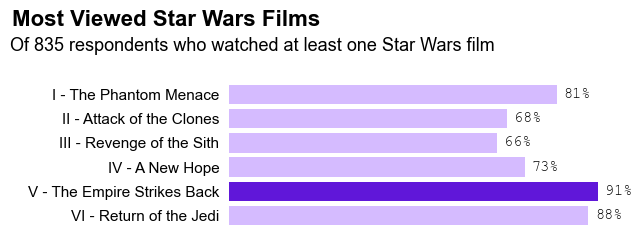

In [32]:
most_viewed(seen_star_wars, [li,li,li,li,da,li])
plt.title(f"Of {len(seen_star_wars)} respondents who watched at least one Star Wars film", x=0.06, y=1.12, fontname="Arial", fontsize=13)

### 4.2.2 Find the highest ranked movies

Text(0.11, 1.12, 'Of 835 respondents who watched at least one Star Wars film')

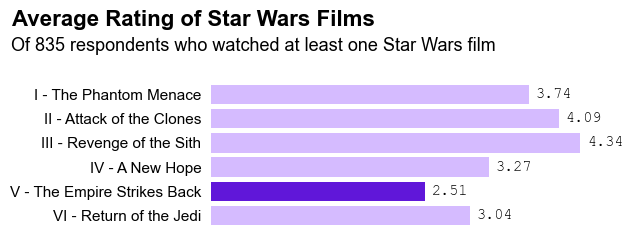

In [33]:
highest_rated(seen_star_wars, [li,li,li,li,da,li])
plt.title(f"Of {len(seen_star_wars)} respondents who watched at least one Star Wars film", x=0.11, y=1.12, fontname="Arial", fontsize=13)

Of all the respondents who have watched at least one Star Wars film, 91% of them have watched the 2nd released film (V - The Empire Strikes Back). It also appears that most respondents who have seen at least one film haven't finished the series. Episodes 2 and 3 were the last to release in the series and were the least watched.

Movies that had the most watchers also had the highest ratings. In this case, Episodes 5 and 6 had the highest number of watchers and highest average ratings. Recall that movies rank from `1` for `most favorite` to `6` for `least favorite`.

## 4.3 Respondents who have seen all six films

### 4.3.1 Find the highest rated movies

For credibility, we include responses from only those who have seen all six films. This is so we exclude the responses where the watcher provided ratings for all six films despite not having seen all of them.

In [34]:
seen_all_movies = star_wars

for i in range(len(star_wars)):
    count = 0
    row = star_wars.iloc[i]
    for column in range(3, 9):
        if row[column] == True and row[1] == True:
            count += 1
            
    if count != 6:
        seen_all_movies = seen_all_movies.drop(index=i)

print(len(seen_all_movies))
print(len(seen_all_movies)/len(star_wars))

471
0.3971332209106239


There are 471 respondents who have seen all six films.

In [35]:
%%capture
most_viewed(seen_all_movies, [li,li,li,li,li,li])
plt.title(f"Of {len(seen_all_movies)} Star Wars fans who watched all six Star Wars films", x=0.04, y=1.12, fontname="Arial", fontsize=13)

The plot above mainly serves to assert the visual is working correctly so it is hidden by default.

We then take the average of all the rating columns grouped by film to find the average rating and plot them.

Text(0.07, 1.12, 'Of 471 respondents who watched all six Star Wars films')

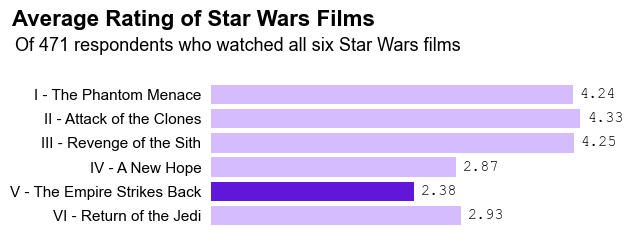

In [36]:
highest_rated(seen_all_movies, [li,li,li,li,da,li])
plt.title(f"Of {len(seen_all_movies)} respondents who watched all six Star Wars films", x=0.07, y=1.12, fontname="Arial", fontsize=13)

The lower the number, the higher the rank as we recall `Rank #1` being the most favorite and `Rank #6` being the least favorite. Here, we see Episode 5 has the highest average rank. Notably, the first three films released (Episodes 4, 5, and 6) are all highly rated. Those who had seen all six films considered the most recent films (Episodes 1, 2, and 3) to be equally their least favorites, ranking them in an average of 4th place out of all 6 films.

 # 5. Explore the data by binary segments

While we obtained some findings based on the general population of Star Wars watchers, we narrow our focus down into more specific segments, namely Star Wars fans, Star Trek fans, gender, and age.

## 5.1 Star Wars fans

In [37]:
len(not_seen_star_wars[not_seen_star_wars["Are you a Star Wars fan?"]==True])

0

We confirm that any one who has not seen a Star Wars film did not label themselves a fan of the series.

In [38]:
star_wars_fans = seen_star_wars[seen_star_wars["Are you a Star Wars fan?"]==True]

print(f"Number of respondents who have seen at least one Star Wars film: {len(seen_star_wars)}")
print(f"Number of watchers who identify as Star Wars fan: {len(star_wars_fans)}")
print(f"{round(len(star_wars_fans)/len(seen_star_wars)*100)}% of those who watched at least one Star Wars movie identified themselves as a Star Wars fan.")
print(f"{round(len(star_wars_fans)/len(star_wars)*100)}% of respondents are Star Wars fans.")

Number of respondents who have seen at least one Star Wars film: 835
Number of watchers who identify as Star Wars fan: 552
66% of those who watched at least one Star Wars movie identified themselves as a Star Wars fan.
47% of respondents are Star Wars fans.


[90.57971014492753, 83.87681159420289, 81.52173913043478, 87.5, 97.46376811594203, 97.28260869565217]
['I - The Phantom Menace', 'II - Attack of the Clones', 'III - Revenge of the Sith', 'IV - A New Hope', 'V - The Empire Strikes Back', 'VI - Return of the Jedi']


Text(0.09, 1.12, 'Of 552 Star Wars fans who watched at least one Star Wars film')

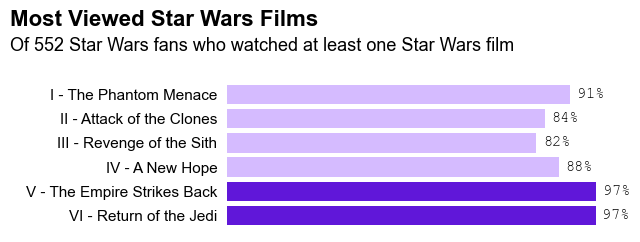

In [39]:
most_viewed(star_wars_fans, [li,li,li,li,da,da])
plt.title(f"Of {len(star_wars_fans)} Star Wars fans who watched at least one Star Wars film", x=0.09, y=1.12, fontname="Arial", fontsize=13)

Text(0.28, 1.12, 'Of 552 Star Wars fans who watched at least one Star Wars film')

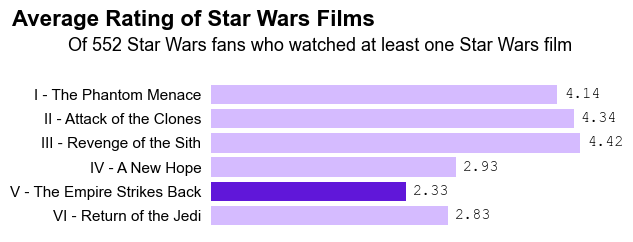

In [40]:
highest_rated(star_wars_fans, [li,li,li,li,da,li])
plt.title(f"Of {len(star_wars_fans)} Star Wars fans who watched at least one Star Wars film", x=0.28, y=1.12, fontname="Arial", fontsize=13)

Mostly all those who identified themselves as Star Wars fans have watched Episodes 5 and 6. In line with the other segmented populations explored thus far (general population, respondents who have seen at least one film, and respondents who have seen all six films), Episode 5 had the highest average rating while Episodes 1-3 essentially tied for 4th.

## 5.2 True Star Wars fans

We group up those who have seen all six movies and identify as a Star Wars fan, labeling them as `true` Star Wars fans.

In [41]:
true_star_wars_fans = seen_all_movies[seen_all_movies["Are you a Star Wars fan?"]==True]

print(f"Number of respondents who have seen all six films: {len(seen_all_movies)}")
print(f"Number of all six movie watchers who identify as Star Wars fan: {len(true_star_wars_fans)}")
print(f"{round(len(true_star_wars_fans)/len(seen_all_movies)*100)}% of those who watched all six movies classified themselves as a Star Wars fan.")
print(f"{round(len(seen_all_movies)/len(star_wars)*100)}% of respondents have watched all six movies.")
print(f"{round(len(true_star_wars_fans)/len(star_wars)*100)}% of respondents have watched all six movies and identified themselves as Star Wars fans.")

Number of respondents who have seen all six films: 471
Number of all six movie watchers who identify as Star Wars fan: 411
87% of those who watched all six movies classified themselves as a Star Wars fan.
40% of respondents have watched all six movies.
35% of respondents have watched all six movies and identified themselves as Star Wars fans.


In [42]:
%%capture
most_viewed(true_star_wars_fans, [li,li,li,da,li,li])
plt.title(f"Of {len(true_star_wars_fans)} Star Wars fans who watched all six Star Wars films", x=0.04, y=1.12, fontname="Arial", fontsize=13)

The plot above mainly serves to assert the visual is working correctly so it is hidden by default.

Text(0.08, 1.12, 'Of 411 Star Wars fans who watched all six Star Wars films')

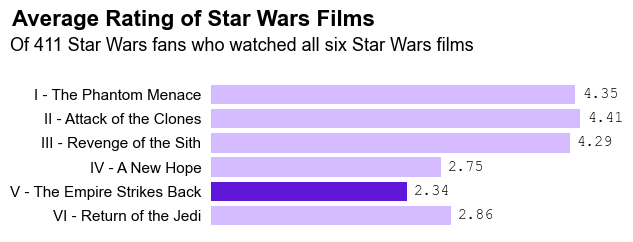

In [43]:
highest_rated(true_star_wars_fans, [li,li,li,li,da,li])
plt.title(f"Of {len(true_star_wars_fans)} Star Wars fans who watched all six Star Wars films", x=0.08, y=1.12, fontname="Arial", fontsize=13)

Mostly all those who identified themselves as Star Wars fans have watched Episodes 5 and 6. In line with the other segmented populations explored thus far (general population, respondents who have seen at least one film, and respondents who have seen all six films), Episode 5 had the highest average rating while Episodes 1-3 essentially tied for 4th.

## 5.3 Star Trek fans

In [44]:
star_trek_fans = seen_star_wars[seen_star_wars["Are you a Star Trek fan?"]==True]

print(f"Number of respondents who identify as Star Trek fan: {len(star_trek_fans)}")

print(f"\nNumber of respondents who have seen at least one Star Wars film: {len(seen_star_wars)}")
print(f"{round(len(star_trek_fans)/len(seen_star_wars)*100)}% of those who have seen a Star Wars film identify as a Star Trek fan.")

print(f"\nNumber of respondents who have seen all six Star Wars films: {len(seen_all_movies)}")
print(f"{round(len(star_trek_fans)/len(seen_all_movies)*100)}% of those who have seen all six Star Wars films identify as a Star Trek fan.")
print(f"{round(len(star_trek_fans)/len(star_wars)*100)}% of respondents identified themselves as Star Trek fans.")

Number of respondents who identify as Star Trek fan: 415

Number of respondents who have seen at least one Star Wars film: 835
50% of those who have seen a Star Wars film identify as a Star Trek fan.

Number of respondents who have seen all six Star Wars films: 471
88% of those who have seen all six Star Wars films identify as a Star Trek fan.
35% of respondents identified themselves as Star Trek fans.


Not surprisingly, a huge majority of Star Trek fans have seen all six Star Wars movies. This could be attributed to the similar sci-fi tones of both series.

[87.71084337349397, 80.96385542168674, 77.59036144578313, 82.40963855421687, 95.66265060240964, 95.42168674698796]
['I - The Phantom Menace', 'II - Attack of the Clones', 'III - Revenge of the Sith', 'IV - A New Hope', 'V - The Empire Strikes Back', 'VI - Return of the Jedi']


Text(0.08, 1.12, 'Of 415 Star Trek fans who watched at least one Star Wars film')

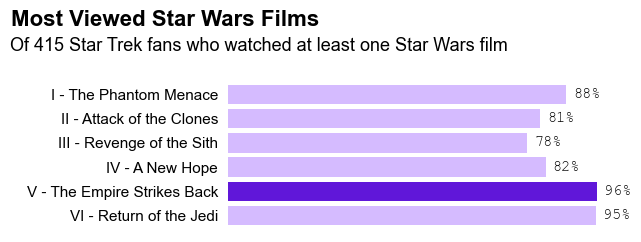

In [45]:
most_viewed(star_trek_fans, [li,li,li,li,da,li])
plt.title(f"Of {len(star_trek_fans)} Star Trek fans who watched at least one Star Wars film", x=0.08, y=1.12, fontname="Arial", fontsize=13)

Text(0.12, 1.12, 'Of 415 Star Trek fans who watched at least one Star Wars film')

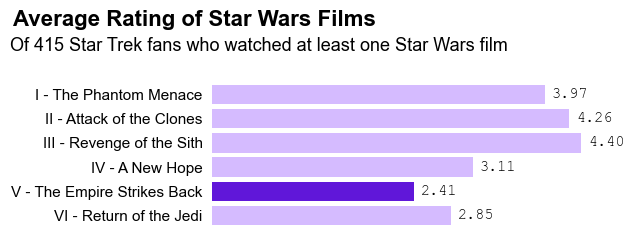

In [46]:
highest_rated(star_trek_fans, [li,li,li,li,da,li])
plt.title(f"Of {len(star_trek_fans)} Star Trek fans who watched at least one Star Wars film", x=0.12, y=1.12, fontname="Arial", fontsize=13)

Star Trek fans share similar sentiments about the films with the other segmented populations explored. Episodes 5 and 6 were the most watched movies and also had the highest average ratings.

## 5.4 Gender

In [47]:
star_wars["Gender"].value_counts(normalize=True)

Gender
Female    0.524857
Male      0.475143
Name: proportion, dtype: float64

There is an almost equal number of survey submissions for each gender with 52% female respondents and 48% male respondents.

In [48]:
seen_star_wars["Gender"].value_counts(normalize=True)

Gender
Male      0.515263
Female    0.484737
Name: proportion, dtype: float64

Of those who have seen at least one Star Wars film, 52% of watchers are male.

In [49]:
not_seen_star_wars["Gender"].value_counts(normalize=True)

Gender
Female    0.672566
Male      0.327434
Name: proportion, dtype: float64

Of those who have not seen any Star Wars films, 67% of them are female.

In [50]:
star_wars["Gender"][star_wars["Are you a Star Wars fan?"]==True].value_counts(normalize=True)

Gender
Male      0.560074
Female    0.439926
Name: proportion, dtype: float64

Of those who identified as a Star Wars fan, 56% of them are male.

In [51]:
star_wars["Gender"][star_wars["Are you a Star Trek fan?"]==True].value_counts(normalize=True)

Gender
Male      0.55792
Female    0.44208
Name: proportion, dtype: float64

Of those who identified as a Star Trek fan, 56% of them are male.

In [52]:
seen_all_movies["Gender"][seen_all_movies["Are you a Star Wars fan?"]==True].value_counts(normalize=True)

Gender
Male      0.605459
Female    0.394541
Name: proportion, dtype: float64

Out of all the true Star Wars fans, 61% of them are male.

In [53]:
seen_all_movies["Gender"][(seen_all_movies["Are you a Star Wars fan?"]==True) & (seen_all_movies["Are you a Star Trek fan?"]==True)].value_counts(normalize=True)

Gender
Male      0.611111
Female    0.388889
Name: proportion, dtype: float64

61% of those identifying as both Star Wars and true Star Trek fans are male.

In [54]:
females = seen_star_wars[seen_star_wars["Gender"]=="Female"]
female_star_wars_fans = seen_star_wars[(seen_star_wars["Gender"]=="Female") & (seen_star_wars["Are you a Star Wars fan?"]==True)]
female_true_star_wars_fans = seen_all_movies[(seen_all_movies["Gender"]=="Female") & (seen_all_movies["Are you a Star Wars fan?"]==True)]

males = seen_star_wars[seen_star_wars["Gender"]=="Male"]
male_star_wars_fans = seen_star_wars[(seen_star_wars["Gender"]=="Male") & (seen_star_wars["Are you a Star Wars fan?"]==True)]
male_true_star_wars_fans = seen_all_movies[(seen_all_movies["Gender"]=="Male") & (seen_all_movies["Are you a Star Wars fan?"]==True)]

In [55]:
populations = [females, female_star_wars_fans, female_true_star_wars_fans, males, male_star_wars_fans, male_true_star_wars_fans]

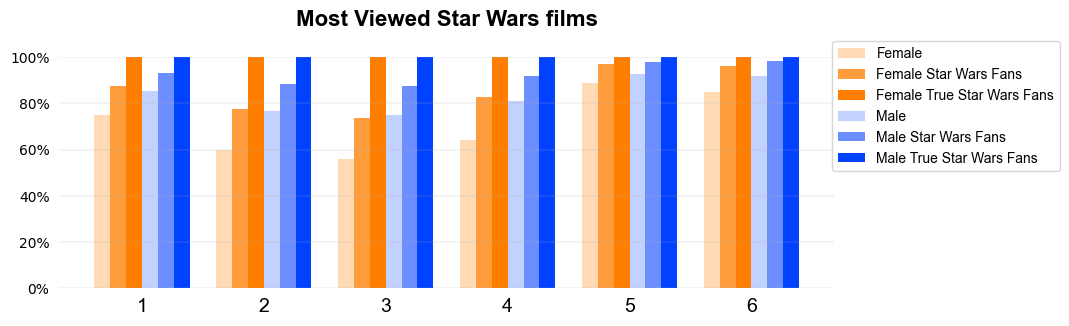

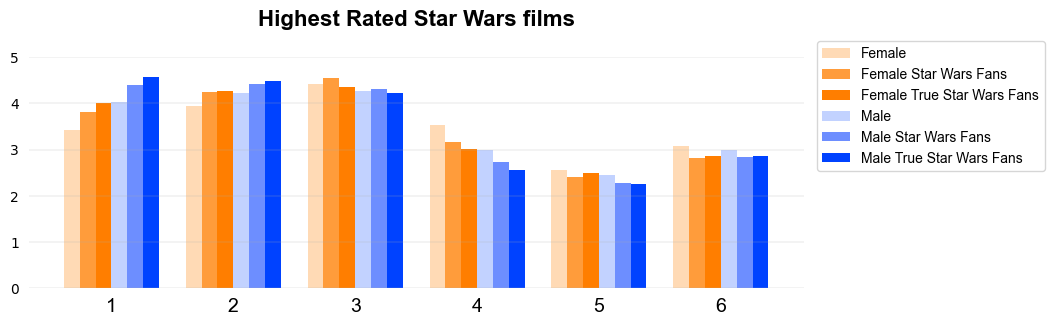

In [56]:
#--------------------------------------------------------------------------------------------#
# Most Viewed Movies
#--------------------------------------------------------------------------------------------#

percents_seen = {}
for i, pop in enumerate(populations):
    values = []
    for j in range(1,7):
        percent_seen = pop[f"Watched Ep {j}"].sum() / len(pop)
        values.append(percent_seen)

    percents_seen[i] = values

pop_1_values = percents_seen[0]
pop_2_values = percents_seen[1]
pop_3_values = percents_seen[2]
pop_4_values = percents_seen[3]
pop_5_values = percents_seen[4]
pop_6_values = percents_seen[5]

bar_positions = range(1,7)
bar_width = 0.13

fig, ax = plt.subplots(figsize = (10, 3), facecolor="#ffffff")
ax.bar(bar_positions, pop_1_values, width=bar_width, label='Female', color="#ffdab5")
ax.bar([p + bar_width for p in bar_positions], pop_2_values, width=bar_width, label='Female Star Wars Fans', color="#ff9c3b")
ax.bar([p + bar_width * 2 for p in bar_positions], pop_3_values, width=bar_width, label='Female True Star Wars Fans', color="#ff7e00")
ax.bar([p + bar_width * 3 for p in bar_positions], pop_4_values, width=bar_width, label='Male', color="#c2d2ff")
ax.bar([p + bar_width * 4 for p in bar_positions], pop_5_values, width=bar_width, label='Male Star Wars Fans', color="#6d8eff")
ax.bar([p + bar_width * 5 for p in bar_positions], pop_6_values, width=bar_width, label='Male True Star Wars Fans', color="#0042ff")

plt.yticks(fontsize=10)
plt.ylim([0,1])
ax.yaxis.set_major_formatter(FuncFormatter('{0:.0%}'.format))

ax.set_xticks([])
plt.xticks([p + bar_width * 2.5 for p in bar_positions], range(1,7), fontname="Arial", fontsize=14)

plt.title('Most Viewed Star Wars films', y=1.1, fontname="Arial", fontsize=16, fontweight="bold")

legend=plt.legend(loc="upper right", bbox_to_anchor=(1.3,1.1))
plt.setp(legend.texts, family='Arial')

plt.grid(axis="y", linewidth=0.2)
                  
spines = ["bottom", "top", "left", "right"]
for spine in spines:
    ax.spines[spine].set_visible(False)
ax.tick_params(left=False, bottom=False)

plt.show()


#--------------------------------------------------------------------------------------------#
# Highest Rated Movies
#--------------------------------------------------------------------------------------------#

average_ratings = {}
for i, pop in enumerate(populations):
    average_rating = pop[pop.columns[9:15]].mean()
    average_ratings[i] = average_rating

pop_1_values = average_ratings[0]
pop_2_values = average_ratings[1]
pop_3_values = average_ratings[2]
pop_4_values = average_ratings[3]
pop_5_values = average_ratings[4]
pop_6_values = average_ratings[5]

bar_positions = range(1,7)
bar_width = 0.13

fig, ax = plt.subplots(figsize = (10, 3), facecolor="#ffffff")
ax.bar(bar_positions, pop_1_values, width=bar_width, label='Female', color="#ffdab5")
ax.bar([p + bar_width for p in bar_positions], pop_2_values, width=bar_width, label='Female Star Wars Fans', color="#ff9c3b")
ax.bar([p + bar_width * 2 for p in bar_positions], pop_3_values, width=bar_width, label='Female True Star Wars Fans', color="#ff7e00")
ax.bar([p + bar_width * 3 for p in bar_positions], pop_4_values, width=bar_width, label='Male', color="#c2d2ff")
ax.bar([p + bar_width * 4 for p in bar_positions], pop_5_values, width=bar_width, label='Male Star Wars Fans', color="#6d8eff")
ax.bar([p + bar_width * 5 for p in bar_positions], pop_6_values, width=bar_width, label='Male True Star Wars Fans', color="#0042ff")

plt.yticks(fontsize=10)
plt.ylim([0,5])

ax.set_xticks([])
plt.xticks([p + bar_width * 2.5 for p in bar_positions], range(1,7), fontname="Arial", fontsize=14)

plt.title('Highest Rated Star Wars films', y=1.1, fontname="Arial", fontsize=16, fontweight="bold")

legend=plt.legend(loc="upper right", bbox_to_anchor=(1.32,1.1))
plt.setp(legend.texts, family='Arial')

plt.grid(axis="y", linewidth=0.2)

spines = ["bottom", "top", "left", "right"]
for spine in spines:
    ax.spines[spine].set_visible(False)
ax.tick_params(left=False, bottom=False)

plt.show()

Those who identified as Star Wars fans viewed more Star Wars movies than those who did not. The percentage of males who watched each Star Wars movie for every Star Wars fan category is higher than the percentage of females in each category. 

Star Wars fans rated least favorite movies lower than non-Star Wars fans and rated most favorite movies higher than non-Star Wars fans on average. We see across the board that the highest ranking movie across the board is Episode 5. The least favorites among all categories are Episodes 1, 2, and 3.

## 5.5 Education

In [57]:
star_wars["Education"].value_counts(normalize=True)

Education
Some college or Associate degree    0.316602
Bachelor degree                     0.309846
Graduate degree                     0.265444
High school degree                  0.101351
Less than high school degree        0.006757
Name: proportion, dtype: float64

In [58]:
not_seen_star_wars["Education"].value_counts(normalize=True)

Education
Some college or Associate degree    0.336364
Bachelor degree                     0.268182
Graduate degree                     0.222727
High school degree                  0.154545
Less than high school degree        0.018182
Name: proportion, dtype: float64

In [59]:
seen_star_wars["Education"].value_counts(normalize=True)

Education
Bachelor degree                     0.320245
Some college or Associate degree    0.311656
Graduate degree                     0.277301
High school degree                  0.087117
Less than high school degree        0.003681
Name: proportion, dtype: float64

In [60]:
seen_all_movies["Education"].value_counts(normalize=True)

Education
Some college or Associate degree    0.332609
Bachelor degree                     0.300000
Graduate degree                     0.271739
High school degree                  0.089130
Less than high school degree        0.006522
Name: proportion, dtype: float64

In [61]:
star_wars_fans["Education"].value_counts(normalize=True)

Education
Bachelor degree                     0.319109
Some college or Associate degree    0.317254
Graduate degree                     0.282004
High school degree                  0.076067
Less than high school degree        0.005566
Name: proportion, dtype: float64

In [62]:
true_star_wars_fans["Education"].value_counts(normalize=True)

Education
Some college or Associate degree    0.336658
Bachelor degree                     0.299252
Graduate degree                     0.276808
High school degree                  0.079800
Less than high school degree        0.007481
Name: proportion, dtype: float64

Most respondents who have seen at least one Star Wars movie have had higher education. The count of participants in each cohort decreases as the number of movies seen goes up and the number of participants who identify as Star Wars fans goes up.

In [63]:
seen_all_movies["Education"][(seen_all_movies["Are you a Star Wars fan?"]==True) & (seen_all_movies["Are you a Star Trek fan?"]==True)].value_counts()

Education
Some college or Associate degree    94
Bachelor degree                     83
Graduate degree                     78
High school degree                  14
Less than high school degree         1
Name: count, dtype: int64

## 5.6 Region

In [64]:
star_wars["Location (Census Region)"].value_counts(normalize=True)

Location (Census Region)
East North Central    0.173538
Pacific               0.167785
South Atlantic        0.162991
Middle Atlantic       0.116970
West South Central    0.105465
West North Central    0.089166
Mountain              0.075743
New England           0.071908
East South Central    0.036433
Name: proportion, dtype: float64

In [65]:
not_seen_star_wars["Location (Census Region)"].value_counts(normalize=True).head(3)

Location (Census Region)
East North Central    0.208889
South Atlantic        0.164444
West South Central    0.151111
Name: proportion, dtype: float64

In [66]:
seen_star_wars["Location (Census Region)"].value_counts(normalize=True).head(3)

Location (Census Region)
Pacific               0.178703
South Atlantic        0.162791
East North Central    0.162791
Name: proportion, dtype: float64

In [67]:
seen_all_movies["Location (Census Region)"].value_counts(normalize=True).head(3)

Location (Census Region)
Pacific               0.172786
East North Central    0.159827
South Atlantic        0.157667
Name: proportion, dtype: float64

In [68]:
star_wars_fans["Location (Census Region)"].value_counts(normalize=True).head(3)

Location (Census Region)
South Atlantic        0.162662
Pacific               0.158965
East North Central    0.155268
Name: proportion, dtype: float64

In [69]:
true_star_wars_fans["Location (Census Region)"].value_counts(normalize=True).head(3)

Location (Census Region)
Pacific               0.166253
East North Central    0.161290
South Atlantic        0.158809
Name: proportion, dtype: float64

Top Star Wars regions in the U.S.:
- `Pacific`: California, Oregon, Washington, Alaska, and Hawaii
- `South Atlantic`: Delaware, Florida, Georgia, Maryland, North Carolina, South Carolina, Virginia, West Virginia, and Washington D.C.
- `East North Central`: Illinois, Indiana, Michigan, Ohio, and Wisconsin

# 6. Explore age populations

## 6.1 Create a function to plot individual age distributions

In [70]:
li = "#fac06e" # yellow
da = "#2a4858" # dark blue

def age_distribution(population, colors):
    """Generates plot showing age distribution for a population in ascending order by age group.
    
    Args:
    - population (function): name of the data set or subset
    - colors (list): list of two strings either 'li' or 'da' to denote light or dark colors for each bar
    """

    age_ranges = population.index
    percent_age = population.values

    fig, ax = plt.subplots(figsize = (4, 2), facecolor="#ffffff")
    bars = ax.bar(age_ranges, percent_age, color = colors)
    ax.tick_params(left=False, bottom=False)
    plt.yticks(fontname="Arial", fontsize=11)
    ax.bar_label(container=bars, fmt="{:.2f}%", padding=5, fontname="Courier New", fontsize=11)
    ax.set_yticks([])
    ax.set_facecolor("#ffffff")
    plt.xticks(rotation=0, fontsize=11)

    spines = ["bottom", "top", "left", "right"]
    for spine in spines:
        ax.spines[spine].set_visible(False)

## 6.2 Respondents by age who submitted a survey

Text(0.5, 1.2, 'Respondents by Age')

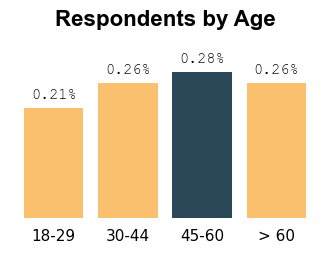

In [71]:
ages_submit_survey = star_wars["Age"].value_counts(normalize=True).sort_index()
age_distribution(ages_submit_survey, [li,li,da,li])
plt.title("Respondents by Age", y = 1.2, fontname="Arial", fontsize=16, fontweight="bold")

There is a fairly equal age distribution of those who submitted a survey but most respondents are between ages 45-60.

## 6.3 Respondents by age who have not seen a Star Wars movie

Text(0.5, 1.2, "Respondents who haven't seen Star Wars")

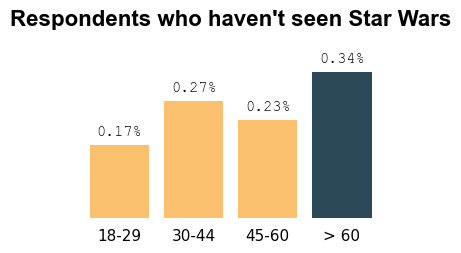

In [72]:
ages_not_seen = not_seen_star_wars["Age"].value_counts(normalize=True).sort_index()
age_distribution(ages_not_seen, [li,li,li,da])
plt.title("Respondents who haven't seen Star Wars", y = 1.2, fontname="Arial", fontsize=16, fontweight="bold")

Of the respondents who have not seen Stars Wars, the majority of them are 60 years old or older. Many of the younger respondents aged 18-29 who submitted a survey have seen at least one Star Wars movie.

## 6.4 Respondents by age who have seen Stars Wars

Text(0.5, 1.2, 'Respondents who have seen Star Wars')

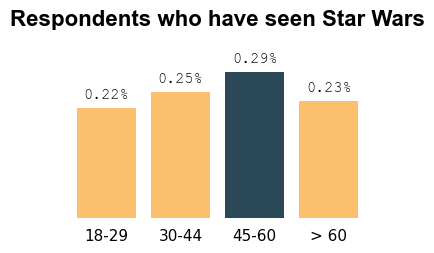

In [73]:
ages_seen = seen_star_wars["Age"].value_counts(normalize=True).sort_index()
age_distribution(ages_seen, [li,li,da,li])
plt.title("Respondents who have seen Star Wars", y = 1.2, fontname="Arial", fontsize=16, fontweight="bold")

# 7. Explore major age population segments

In [74]:
ages_18_seen = seen_star_wars[seen_star_wars["Age"]=="18-29"]
ages_30_seen = seen_star_wars[seen_star_wars["Age"]=="30-44"]
ages_45_seen = seen_star_wars[seen_star_wars["Age"]=="45-60"]
ages_60_seen = seen_star_wars[seen_star_wars["Age"]=="> 60"]

ages_18_all = seen_all_movies[seen_all_movies["Age"]=="18-29"]
ages_30_all = seen_all_movies[seen_all_movies["Age"]=="30-44"]
ages_45_all = seen_all_movies[seen_all_movies["Age"]=="45-60"]
ages_60_all = seen_all_movies[seen_all_movies["Age"]=="> 60"]

ages_18_fan = star_wars_fans[star_wars_fans["Age"]=="18-29"]
ages_30_fan = star_wars_fans[star_wars_fans["Age"]=="30-44"]
ages_45_fan = star_wars_fans[star_wars_fans["Age"]=="45-60"]
ages_60_fan = star_wars_fans[star_wars_fans["Age"]=="> 60"]

ages_18_true_fan = true_star_wars_fans[true_star_wars_fans["Age"]=="18-29"]### Respondents who have seen Stars Wars
ages_30_true_fan = true_star_wars_fans[true_star_wars_fans["Age"]=="30-44"]
ages_45_true_fan = true_star_wars_fans[true_star_wars_fans["Age"]=="45-60"]
ages_60_true_fan = true_star_wars_fans[true_star_wars_fans["Age"]=="> 60"]

## 7.1 Create functions to plot grouped age distributions

In [75]:
li = "#fac06e" # light
me = "#64c987" # medium
ha = "#00898a" # hard
da = "#2a4858" # dark

#--------------------------------------------------------------------------------------------#
# Most Viewed Movies
#--------------------------------------------------------------------------------------------#

def age_most_viewed(populations):
    """Generates plot showing most viewed movies in ascending order by episode for each age group.
    
    Args:
    - population (function): name of the data set or subset
    - colors (list): list of four strings either 'li', 'me', 'ha, or 'da' to denote light or dark colors for each bar
    """
    
    percents_seen = {}
    for i, pop in enumerate(populations):
        values = []
        for j in range(1,7):
            percent_seen = pop[f"Watched Ep {j}"].sum() / len(pop)
            values.append(percent_seen)

        percents_seen[i] = values

    pop_1_values = percents_seen[0]
    pop_2_values = percents_seen[1]
    pop_3_values = percents_seen[2]
    pop_4_values = percents_seen[3]

    bar_positions = range(1,7)
    bar_width = 0.13

    fig, ax = plt.subplots(figsize = (10, 3), facecolor="#ffffff")
    ax.bar(bar_positions, pop_1_values, width=bar_width, label='18-29', color=li)
    ax.bar([p + bar_width for p in bar_positions], pop_2_values, width=bar_width, label='30-44', color=me)
    ax.bar([p + bar_width * 2 for p in bar_positions], pop_3_values, width=bar_width, label='45-59', color=ha)
    ax.bar([p + bar_width * 3 for p in bar_positions], pop_4_values, width=bar_width, label='> 60', color=da)

    plt.yticks(fontsize=10)
    plt.ylim([0,1])
    ax.yaxis.set_major_formatter(FuncFormatter('{0:.0%}'.format))

    ax.set_xticks([])
    plt.xticks([p + bar_width * 1.5 for p in bar_positions], range(1,7), fontname="Arial", fontsize=14)

    plt.title('Most Viewed Star Wars films', y=1.1, fontname="Arial", fontsize=16, fontweight="bold")

    legend=plt.legend(loc="upper right", bbox_to_anchor=(1.3,1.1))
    plt.setp(legend.texts, family='Arial')

    plt.grid(axis="y", linewidth=0.2)

    spines = ["bottom", "top", "left", "right"]
    for spine in spines:
        ax.spines[spine].set_visible(False)
    ax.tick_params(left=False, bottom=False)

    plt.show()


#--------------------------------------------------------------------------------------------#
# Highest Rated Movies
#--------------------------------------------------------------------------------------------#

def age_highest_rated(populations):
    """Generates plot showing highest rated movies in ascending order by episode for each age group.
    
    Args:
    - population (function): name of the data set or subset
    - colors (list): list of four strings either 'li', 'me', 'ha, or 'da' to denote light or dark colors for each bar
    """
    
    average_ratings = {}
    for i, pop in enumerate(populations):
        average_rating = pop[pop.columns[9:15]].mean()
        average_ratings[i] = average_rating

    pop_1_values = average_ratings[0]
    pop_2_values = average_ratings[1]
    pop_3_values = average_ratings[2]
    pop_4_values = average_ratings[3]

    bar_positions = range(1,7)
    bar_width = 0.13

    fig, ax = plt.subplots(figsize = (10, 3), facecolor="#ffffff")
    ax.bar(bar_positions, pop_1_values, width=bar_width, label='18-29', color=li)
    ax.bar([p + bar_width for p in bar_positions], pop_2_values, width=bar_width, label='30-44', color=me)
    ax.bar([p + bar_width * 2 for p in bar_positions], pop_3_values, width=bar_width, label='45-59', color=ha)
    ax.bar([p + bar_width * 3 for p in bar_positions], pop_4_values, width=bar_width, label='> 60', color=da)

    plt.yticks(fontsize=10)
    plt.ylim([0,5])

    ax.set_xticks([])
    plt.xticks([p + bar_width * 1.5 for p in bar_positions], range(1,7), fontname="Arial", fontsize=14)

    plt.title('Highest Rated Star Wars films', y=1.1, fontname="Arial", fontsize=16, fontweight="bold")

    legend=plt.legend(loc="upper right", bbox_to_anchor=(1.32,1.1))
    plt.setp(legend.texts, family='Arial')

    plt.grid(axis="y", linewidth=0.2)

    spines = ["bottom", "top", "left", "right"]
    for spine in spines:
        ax.spines[spine].set_visible(False)
    ax.tick_params(left=False, bottom=False)

    plt.show()

## 7.2 Respondents by age who have seen at least one Star Wars movie

In [76]:
populations = [ages_18_seen, ages_30_seen, ages_45_seen, ages_60_seen]

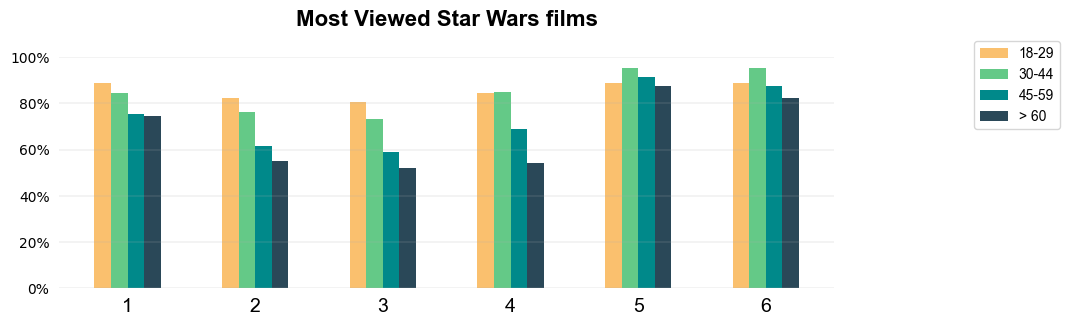

In [77]:
age_most_viewed(populations)

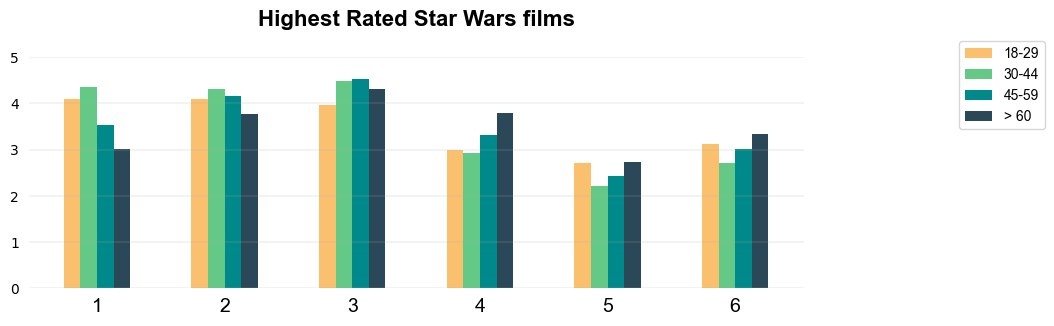

In [78]:
age_highest_rated(populations)

## 7.3 Respondents by age who have seen all six movies

In [79]:
populations = [ages_18_all, ages_30_all, ages_45_all, ages_60_all]

In [80]:
%%capture
age_most_viewed(populations)

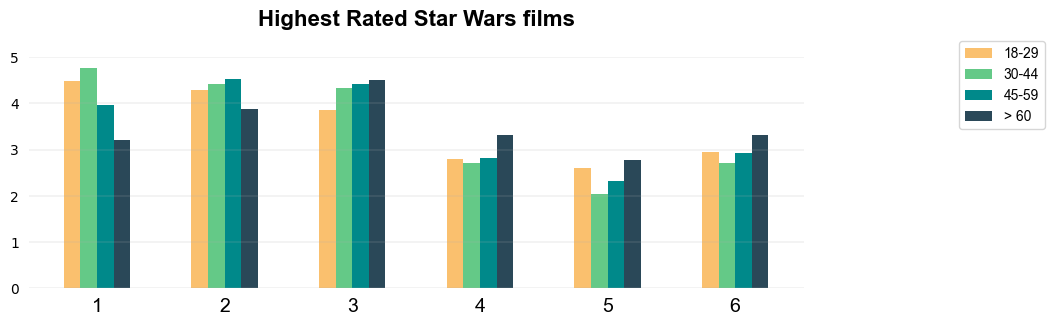

In [81]:
age_highest_rated(populations)

## 7.4 Star Wars fans by age

In [82]:
populations = [ages_18_fan, ages_30_fan, ages_45_fan, ages_60_fan]

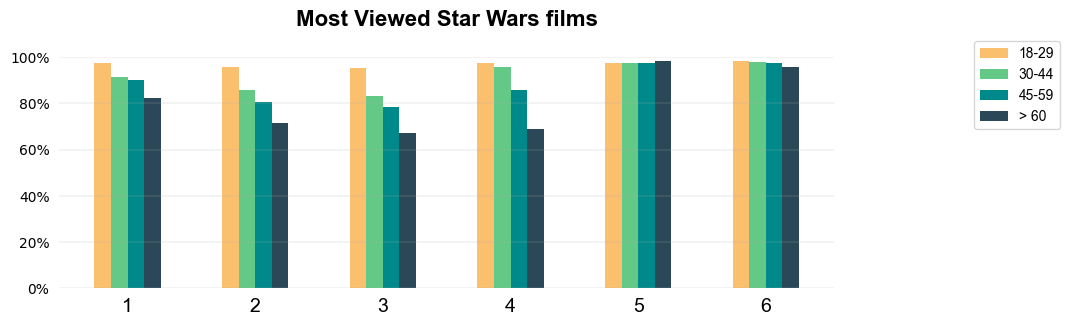

In [83]:
age_most_viewed(populations)

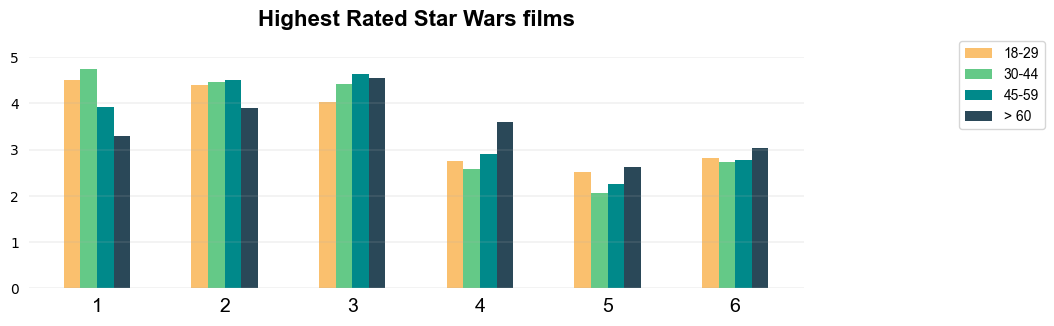

In [84]:
age_highest_rated(populations)

## 7.5 True Star Wars fans by age

In [85]:
populations = [ages_18_true_fan, ages_30_true_fan, ages_45_true_fan, ages_60_true_fan]

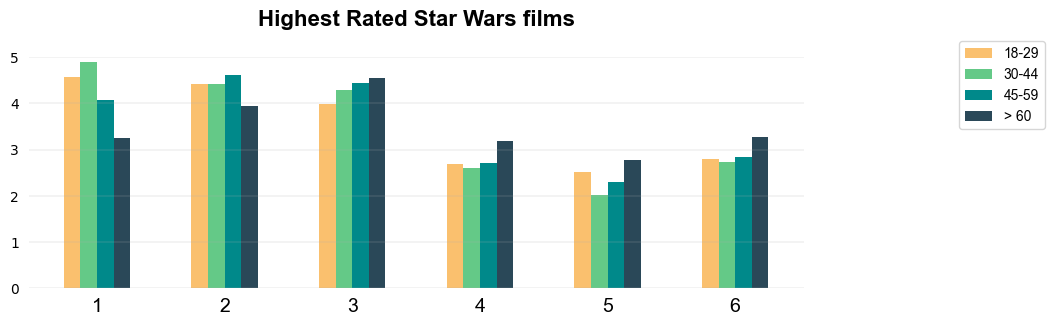

In [86]:
age_highest_rated(populations)